# **Project Name:** IBM HR Analytics: Employee Attrition Analysis & Prediction

### **Tools** - Python, ML, SQL, Excel
### **Domain** - Data Analytics, Data Science
### **No of Members** - 1
### **Member Name** - Shubhayan Baral
### **Contribution** - Individual

## **Business Problem & Objective**

### **Problem Statement**
Employee attrition is a major challenge for organizations as it increases recruitment cost, reduces productivity, and leads to loss of experienced talent.

### **Objective**
The objective of this project is to:

- Analyze factors affecting employee attrition

- Identify key drivers behind attrition

- Build a machine learning model to predict whether an employee is likely to leave the organization

# ***Let's Start!***

## *Import Libraries*

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## *Import Dataset*

In [24]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

In [25]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
df.shape

(1470, 35)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [28]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## ***Data Visualisation & Exploratory Data Analysis***

## Attrition Distribution

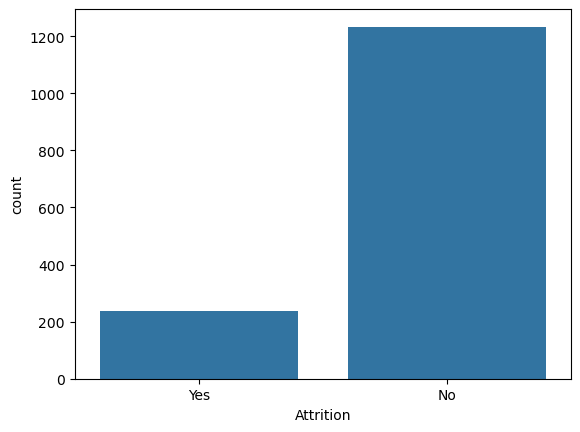

In [29]:
sns.countplot(x="Attrition", data=df)
plt.show()

### *The dataset is imbalanced, with significantly fewer employees leaving compared to those staying.*

## Age vs Attrition

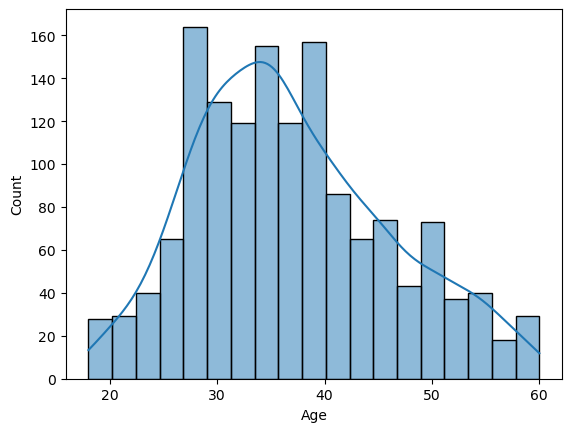

In [30]:
sns.histplot(df["Age"], kde=True)
plt.show()

### *Younger employees show higher attrition, suggesting early-career instability.*

## Monthly Income vs Attrition

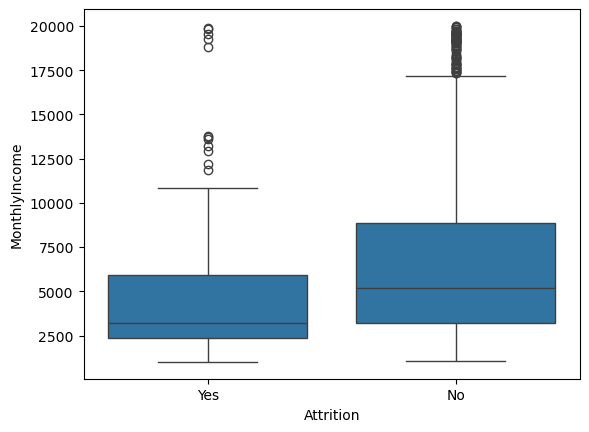

In [31]:
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.show()

### *Employees with lower monthly income are more likely to leave the organization.*

## Distance from Home vs Attrition

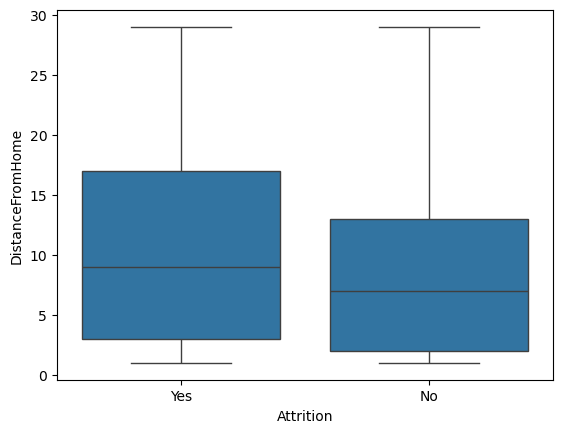

In [32]:
sns.boxplot(x="Attrition", y="DistanceFromHome", data=df)
plt.show()

### *Employees who are living far from office are more likely to leave the orginazation due to long travel distance*

## Overtime vs Attrition

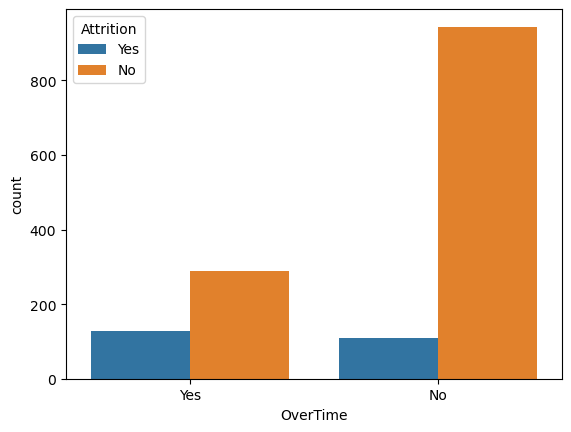

In [33]:
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.show()

### *Employees working overtime show a much higher attrition rate, indicating work-life balance issues.*

## Jobrole vs Attrition

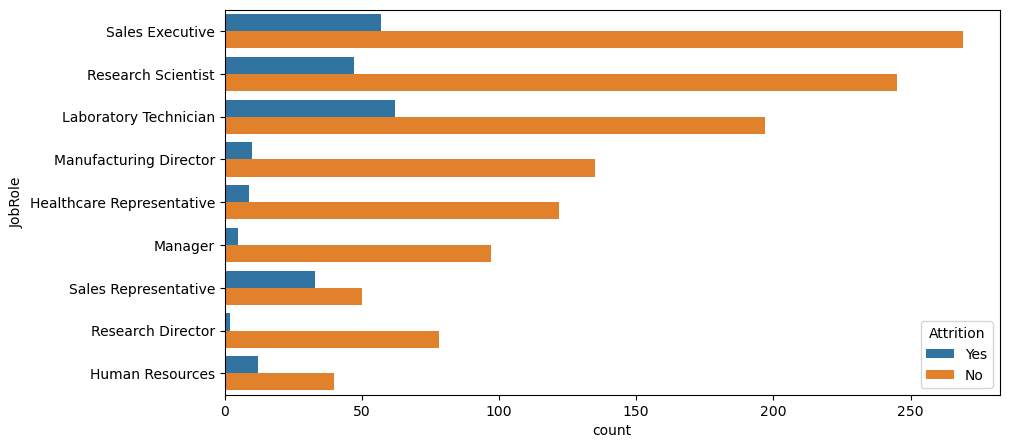

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(y="JobRole", hue="Attrition", data=df)
plt.show()

### *Employees working in specific job roles such as Sales Executive, Research Scientist have higher attrition rates than others.*

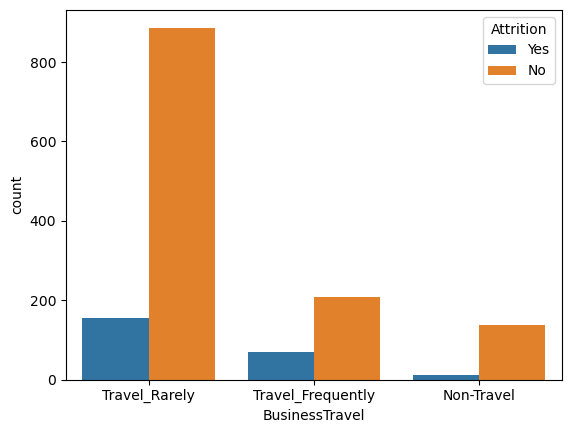

In [35]:
sns.countplot(x="BusinessTravel", hue="Attrition", data=df)
plt.show()

### *Traveling is a major factor when comes to attriton*

In [36]:
df["Attrition"] = df["Attrition"].str.strip().map({"Yes": 1, "No": 0})
df["OverTime"] = df["OverTime"].map({"Yes":1, "No":0})
df = pd.get_dummies(df, drop_first=True)

In [37]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [38]:
# train test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## **Model Implementation(Decision Tree)**

In [39]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7777777777777778

Confusion Matrix:
 [[324  56]
 [ 42  19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       380
           1       0.25      0.31      0.28        61

    accuracy                           0.78       441
   macro avg       0.57      0.58      0.57       441
weighted avg       0.80      0.78      0.79       441



## **Model Implementation(Random Forest)**

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    max_depth=8,
    min_samples_split=20
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=20, n_estimators=200, random_state=42)

In [42]:
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8480725623582767

Confusion Matrix:
 [[353  27]
 [ 40  21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       380
           1       0.44      0.34      0.39        61

    accuracy                           0.85       441
   macro avg       0.67      0.64      0.65       441
weighted avg       0.83      0.85      0.84       441



## **Comparative Analysis**

| Metric              | Decision Tree | Random Forest |
| ------------------- | ------------- | ------------- |
| Accuracy            | 77.8%         | **84.8%**     |
| Attrition Recall    | 0.31          | **0.34**      |
| Attrition Precision | 0.25          | **0.44**      |
| Attrition F1-score  | 0.28          | **0.39**      |
| False Positives     | 56            | **27**        |


Random Forest provides a better balance between identifying attrition cases and minimizing incorrect predictions, making it more suitable for real-world HR decision-making.